In [4]:
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
%matplotlib inline
%run ../../scripts/plotting_helper.py
from matplotlib import pyplot as plt

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figureS1"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg", ".eps"]
filetype = "svg"
sc.settings.figdir = output_dir
sc.set_figure_params(format=filetype, transparent=True)
sc.set_figure_params(dpi_save=150, figsize=(2.5, 2.5))


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)

width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]

plt.style.use("../../scripts/paper.mplstyle")

<Figure size 432x288 with 0 Axes>

In [2]:
# Just the B Cells instead:
adata = sc.read_h5ad("../../h5ad_objects/full_object.h5ad")
# filter out very low abundance cells
label = "celltypist_all"

filter_low_abundance_celltypes = True
if filter_low_abundance_celltypes:
    select = adata.obs[label].value_counts() > (adata.obs.shape[0] / 100)
    adata = adata[adata.obs[label].isin(select[select == True].index)]
    print(adata.obs.shape)

(79473, 69)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

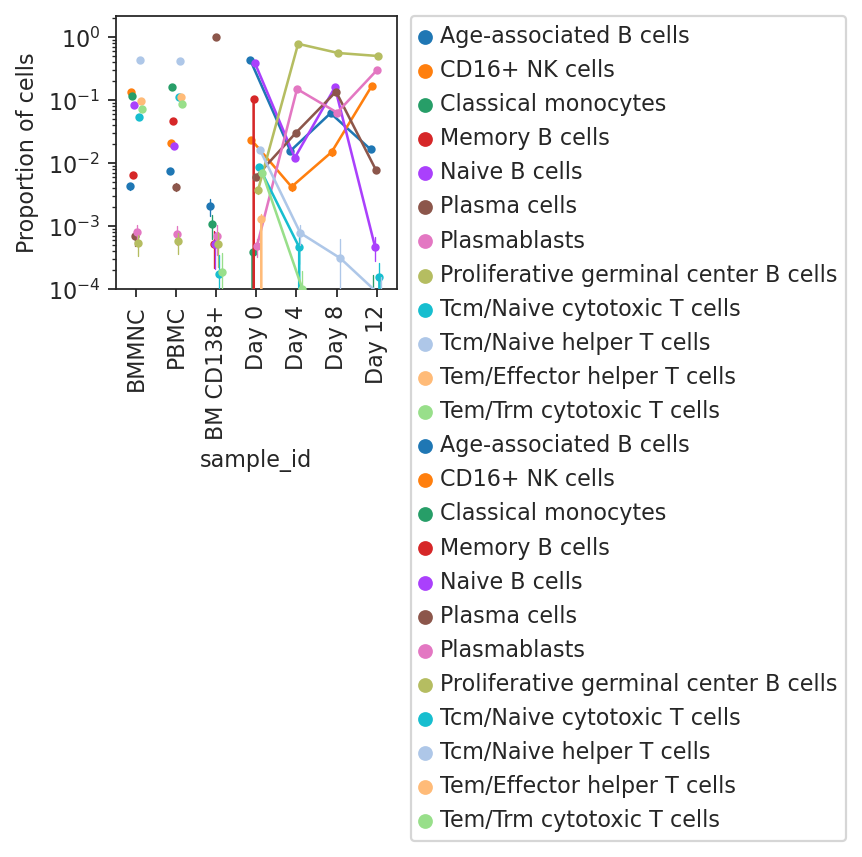

In [5]:
group = "sample_id"
order = plot_order
boots = 1000
hold_stats = []
data = adata.obs
for i in range(boots):
    bootstrap = data.groupby(group).sample(frac=1, replace=True)
    stats = pd.DataFrame(bootstrap.groupby(group)[label].value_counts(normalize=True))
    stats.columns = ["proportion"]
    hold_stats.append(stats)
    
data = pd.concat(hold_stats)
data.reset_index(inplace=True)
data.columns = [group, label, "proportion"]

width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
sns.set_style("ticks")
scale = 2
fig, ax = plt.subplots(1, 1, figsize=(width, height))
data1 = data[data[group].str.contains("Day")]
data2 = data[~data[group].str.contains("Day")]
sns.pointplot(
    x=group,
    y="proportion",
    hue=label,
    capsize=0,
    scale=0.8,
    kind="point",
    data=data1,
    join=True,
    ci="sd",
    lw=1,
    errwidth=0.6,
    order=order,
    dodge=True, legend=[], ax = ax
)

sns.pointplot(
    x=group,
    y="proportion",
    hue=label,
    capsize=0,
    scale=0.8,
    kind="point",
    data=data2,
    join=False,
    ci="sd",
    errwidth=0.6,
    order=order,
    dodge=True, legend = False, ax=ax
)
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
locs, labels = plt.xticks()
plt.ylim(0.0001)
plt.ylabel("Proportion of cells")
plt.setp(labels, rotation=90)
#ax.get_legend().remove()

In [6]:
save_figure(fig, "Proportion_PointPlot_allCells_no_legend")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
